## Introduction

This notebook is about the analysis of the women representation in the city property of San Francisco.The goal of this is to do an EDA on the ratio of men and women in various facilities of the city, and find where both genders are larger along with some possible reasons behind that.There's 82 places named by people in the city's property. The types of information included in the file is the department of the named place, name of the place, the person it's named after, the gender of the person, reference, comments, and following numbers about the different districts. I will use visualization techniques to show the disproportion between female and male named in the different areas.

In [39]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # more visualization

In [40]:
# Import data
file_path ='WomenRepresentaionInCityProperty-SanFrancisco.csv'
data = pd.read_csv(file_path)
data.head()

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,Public Health,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,NaN,facilities and other amenities,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,NaN,facilities and other amenities,4,10,36,21,21


In [97]:
data.describe(include='all')

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,72,72,71,72,49,27,72.0,72.0,72.0,72.0,72.0
unique,8,72,59,2,21,11,NaN,NaN,NaN,NaN,NaN
top,Administrator,"Elsa Strait Room, Eureka Valley Recreation Center",George R. Moscone,M,Municipal Transportation Agency,facilities and other amenities,NaN,NaN,NaN,NaN,NaN
freq,41,1,6,53,9,10,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0


From the column summary above, we can see that there are 8 unique Departments/Source and 5 Gender values. 

### Gender ratio by departments

In [98]:
# Gender categories 
gender = data["Gender"].value_counts()
gender

M    53
F    19
Name: Gender, dtype: int64

There are 5 different Discriptions for Gender and that is because the city property is named after two persons.that is  F & M means a the first name is that of a female and the second a male. We are interested in the ratio of we men to men only and so this rows are not relevant for the analysis. 

In [99]:
#drop the rows
data = data[~data["Gender"].isin(["F & M","M & M","M & F"])]

In [100]:
gender = data["Gender"].value_counts()
gender

M    53
F    19
Name: Gender, dtype: int64

In [101]:
# Departments
dpt = data["Department/Source"].value_counts()
dpt

Administrator    41
REC AND PARKS    15
LIBRARY           5
RED               3
SFMTA             3
PUC               2
Port              2
AIRPORT           1
Name: Department/Source, dtype: int64

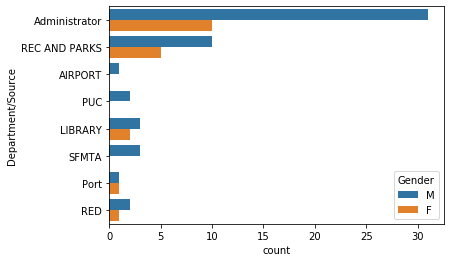

In [102]:
sns.countplot(y = "Department/Source" ,hue ="Gender", data = data)

The Department of the Administor has the higest number of city properties named after people.The remaining depatments seem to have as low as one city property named after a person.

In [103]:
# percentage of city property named after women and men by Departments.
gender_per =data.pivot_table(index='Department/Source',columns='Gender',aggfunc=np.size)
gender_per

Analysis Neighborhoods       Comments        \
Gender                                 F     M        F     M   
Department/Source                                               
AIRPORT                              NaN   1.0      NaN   1.0   
Administrator                       10.0  31.0     10.0  31.0   
LIBRARY                              2.0   3.0      2.0   3.0   
PUC                                  NaN   2.0      NaN   2.0   
Port                                 1.0   1.0      1.0   1.0   
REC AND PARKS                        5.0  10.0      5.0  10.0   
RED                                  1.0   2.0      1.0   2.0   
SFMTA                                NaN   3.0      NaN   3.0   

                  Current Police Districts       Current Supervisor Districts  \
Gender                                   F     M                            F   
Department/Source                                                               
AIRPORT                                NaN   1.0                          NaN   
Administrator                         10.0  31.0                         10.0   
LIBRARY                                2.0   3.0                          2.0   
PUC                                    NaN   2.0                          NaN   
Port                                   1.0   1.0                          1.0   
REC AND PARKS                          5.0  10.0                          5.0   
RED                                    1.0   2.0                          1.0   
SFMTA                                  NaN   3.0                          NaN   

                         Name       Neighborhoods       Person        \
Gender                M     F     M             F     M      F     M   
Department/Source                                                      
AIRPORT             1.0   NaN   1.0           NaN   1.0    NaN   1.0   
Administrator      31.0  10.0  31.0          10.0  31.0   10.0  31.0   
LIBRARY             3.0   2.0   3.0           2.0   3.0    2.0   3.0   
PUC                 2.0   NaN   2.0           NaN   2.0    NaN   2.0   
Port                1.0   1.0   1.0           1.0   1.0    1.0   1.0   
REC AND PARKS      10.0   5.0  10.0           5.0  10.0    5.0  10.0   
RED                 2.0   1.0   2.0           1.0   2.0    1.0   2.0   
SFMTA               3.0   NaN   3.0           NaN   3.0    NaN   3.0   

                  Reference       SF Find Neighborhoods        
Gender                    F     M                     F     M  
Department/Source                                              
AIRPORT                 NaN   1.0                   NaN   1.0  
Administrator          10.0  31.0                  10.0  31.0  
LIBRARY                 2.0   3.0                   2.0   3.0  
PUC                     NaN   2.0                   NaN   2.0  
Port                    1.0   1.0                   1.0   1.0  
REC AND PARKS           5.0  10.0                   5.0  10.0  
RED                     1.0   2.0                   1.0   2.0  
SFMTA                   NaN   3.0                   NaN   3.0

In [104]:
gender_per.fillna(0,inplace=True)
gender_per.columns = gender_per.columns.droplevel()
gender_per.columns.name = None

In [105]:
gender_per1 = gender_per.iloc[:,0:2]
gender_per1["sum"] = gender_per1.sum(axis=1)

/home/zenret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
gender_per1['F'] = gender_per1['F']/gender_per1["sum"] * 100
gender_per1['F'] 

/home/zenret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Department/Source
AIRPORT           0.000000
Administrator    24.390244
LIBRARY          40.000000
PUC               0.000000
Port             50.000000
REC AND PARKS    33.333333
RED              33.333333
SFMTA             0.000000
Name: F, dtype: float64

In [108]:
gender_per1['M'] = gender_per1['M']/gender_per1["sum"] * 100
gender_per1['M'] 

/home/zenret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Department/Source
AIRPORT          100.000000
Administrator     75.609756
LIBRARY           60.000000
PUC              100.000000
Port              50.000000
REC AND PARKS     66.666667
RED               66.666667
SFMTA            100.000000
Name: M, dtype: float64

In [109]:
gender_per1

,F,M,sum
Department/Source,,,
AIRPORT,0.000000,100.000000,1.0
Administrator,24.390244,75.609756,41.0
LIBRARY,40.000000,60.000000,5.0
PUC,0.000000,100.000000,2.0
Port,50.000000,50.000000,2.0
REC AND PARKS,33.333333,66.666667,15.0
RED,33.333333,66.666667,3.0
SFMTA,0.000000,100.000000,3.0


### Summary Analysis

Women had the highest representation in the Department of Port were  women and men had well balance equal amount %50 each followed by the library 40%. In Administrator, where most city properties were named after people, women had only a 24% representation and Departments like Airport,PUC and SFMTA have no women representation. 